<a href="https://colab.research.google.com/github/stephiioo/data_sci_4_web_viz/blob/main/HHA_507_homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. R's Shiny Visualization

In [ ]:
## Load necessary packages
import pandas as pd
import matplotlib.pyplot as plt
!pip install ipywidgets jupyter_contrib_nbextensions

In [ ]:
## fetch the data

nj = pd.read_csv('/content/PLACES__Local_Data_for_Better_Health__County_Data_2023_release.csv')
nj.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'LocationName', 'DataSource',
       'Category', 'Measure', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopulation',
       'LocationID', 'CategoryID', 'MeasureId', 'DataValueTypeID',
       'Short_Question_Text', 'Geolocation', 'Counties'],
      dtype='object')

In [ ]:
## Filter for 'DEPRESSION' as measureid and 'Age-adjusted prevalence' as data_value_type

nj = nj[(nj['MeasureId'] == 'DEPRESSION') & (nj['Data_Value_Type'] == 'Age-adjusted prevalence')]
nj

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation,Counties
43,2021,NJ,New Jersey,Bergen,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,Age-adjusted prevalence,15.8,...,13.5,18.2,953819,34003,HLTHOUT,DEPRESSION,AgeAdjPrv,Depression,POINT (-74.0747272 40.9596985),487
263,2021,NJ,New Jersey,Burlington,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,Age-adjusted prevalence,20.2,...,17.1,23.4,464269,34005,HLTHOUT,DEPRESSION,AgeAdjPrv,Depression,POINT (-74.6630063 39.8757858),2447
284,2021,NJ,New Jersey,Mercer,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,Age-adjusted prevalence,19.0,...,16.1,22.1,385898,34021,HLTHOUT,DEPRESSION,AgeAdjPrv,Depression,POINT (-74.703724 40.2825026),2489
450,2021,NJ,New Jersey,Somerset,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,Age-adjusted prevalence,16.6,...,13.8,19.6,345647,34035,HLTHOUT,DEPRESSION,AgeAdjPrv,Depression,POINT (-74.6199378 40.5655273),490
453,2021,NJ,New Jersey,Passaic,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,Age-adjusted prevalence,16.5,...,14.1,19.0,518117,34031,HLTHOUT,DEPRESSION,AgeAdjPrv,Depression,POINT (-74.2994078 41.0366554),2493
465,2021,NJ,New Jersey,Union,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,Age-adjusted prevalence,16.7,...,14.3,19.4,572114,34039,HLTHOUT,DEPRESSION,AgeAdjPrv,Depression,POINT (-74.3086957 40.6598707),2532
569,2021,NJ,New Jersey,Salem,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,Age-adjusted prevalence,22.6,...,18.7,26.7,65046,34033,HLTHOUT,DEPRESSION,AgeAdjPrv,Depression,POINT (-75.3573559 39.5738282),2494
603,2021,NJ,New Jersey,Cape May,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,Age-adjusted prevalence,22.7,...,19.0,26.7,95661,34009,HLTHOUT,DEPRESSION,AgeAdjPrv,Depression,POINT (-74.8463541 39.0858411),2449
828,2021,NJ,New Jersey,Sussex,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,Age-adjusted prevalence,21.4,...,17.9,25.4,145543,34037,HLTHOUT,DEPRESSION,AgeAdjPrv,Depression,POINT (-74.6919141 41.1374609),2586
895,2021,NJ,New Jersey,Cumberland,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,Age-adjusted prevalence,20.4,...,16.8,24.2,153627,34011,HLTHOUT,DEPRESSION,AgeAdjPrv,Depression,POINT (-75.1216277 39.3284336),2485


In [ ]:
## Group by 'LocationName' and get the average (or sum) 'Data_Value'
grouped = nj.groupby('LocationName').Data_Value.mean().sort_values(ascending=False)
grouped

LocationName
Ocean         22.8
Cape May      22.7
Salem         22.6
Warren        21.6
Camden        21.6
Hunterdon     21.4
Sussex        21.4
Gloucester    21.3
Atlantic      20.7
Cumberland    20.4
Burlington    20.2
Monmouth      19.7
Mercer        19.0
Morris        18.2
Middlesex     17.0
Essex         17.0
Union         16.7
Hudson        16.6
Somerset      16.6
Passaic       16.5
Bergen        15.8
Name: Data_Value, dtype: float64

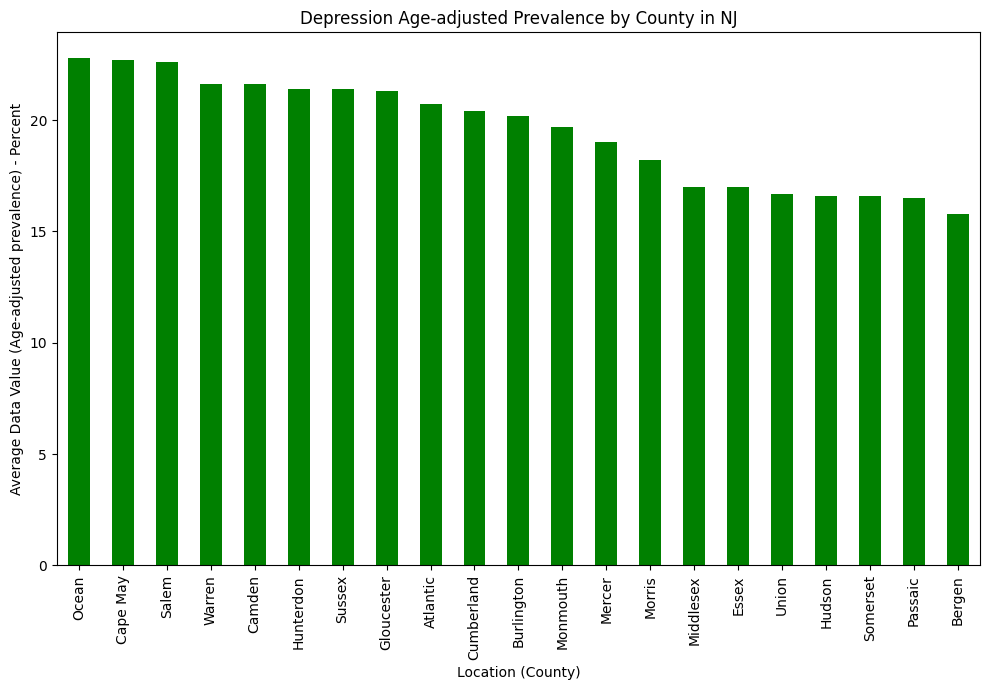

In [ ]:
## Plotting
plt.figure(figsize=(10, 7))
grouped.plot(kind='bar', color='green')
plt.ylabel('Average Data Value (Age-adjusted prevalence) - Percent')
plt.xlabel('Location (County)')
plt.title('Depression Age-adjusted Prevalence by County in NJ')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("depression_stats_per_location.png")  # Saving the plot as an image
plt.show()

In [ ]:
import ipywidgets as widgets

## Compute the average data value across all counties
avg_data_value = nj['Data_Value'].mean()

## Sort the counties in ascending order for the dropdown list
sorted_counties = sorted(nj['LocationName'].unique())

## Interactive selection of county for visualization using ipywidgets
@widgets.interact(County=sorted_counties)
def plot_data(County):
    county_value = nj[nj['LocationName'] == County]['Data_Value'].values[0]

    ## Labels for bars
    labels = [County, 'Average across all counties']

    ## Data values for bars
    values = [county_value, avg_data_value]

    plt.figure(figsize=(8, 6))

    ## Plot the bars
    colors = ['lightgreen', 'lightblue']
    plt.bar(labels, values, color=colors)

    plt.ylabel('Data Value (Age-adjusted prevalence) - Percent')
    plt.title(f'Depression Age-adjusted Prevalence in {County} vs Average across all counties')

    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='County', options=('Atlantic', 'Bergen', 'Burlington', 'Camden', 'C…